In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def detect_fingerprint_contours(image_path):
    image = cv2.imread(image_path)
    display_image(image, "Original Image")
    # Step 1
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(gray, "Step 1: Grayscale Image")
    # Step 2
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    display_image(blurred, "Step 2: Blurred Image")
    # Step 3
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)
    display_image(magnitude, "Step 3: Edge Detection Result")
    # Step 4
    _, binary = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    display_image(binary, "Step 4: Binary Image")
    # Step 5
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    display_image(binary, "Step 5: Enhanced Binary Image")
    # Step 6
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # print("Fingerprint detected!")
        cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
        display_image(image, "Contours on fingerprint")
    else:
        print("No fingerprint detected.")

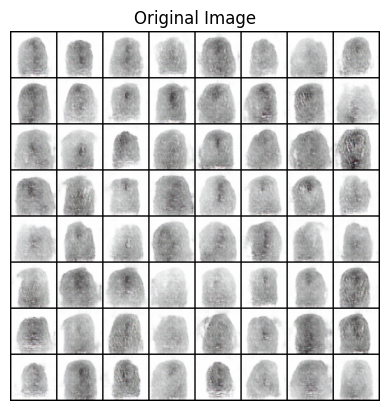

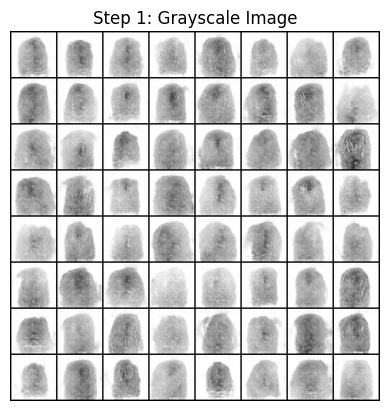

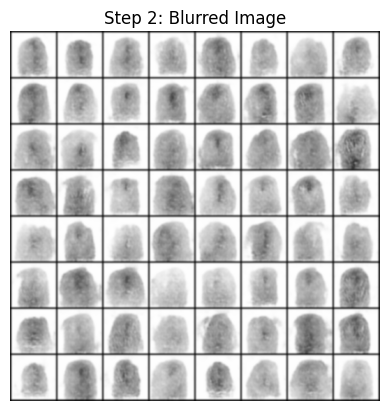

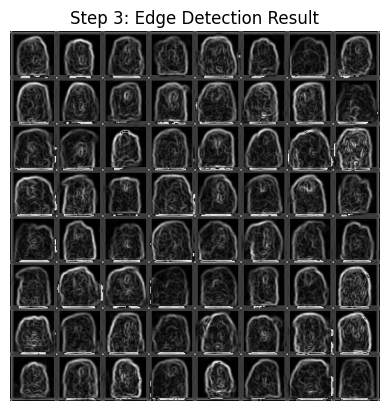

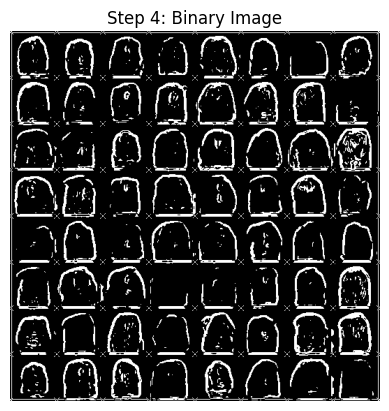

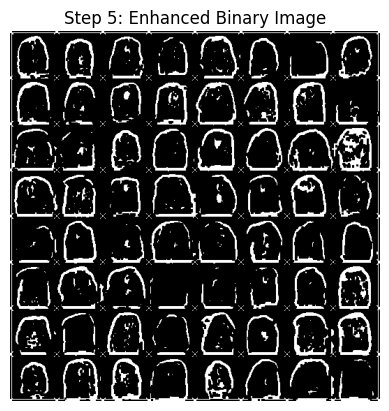

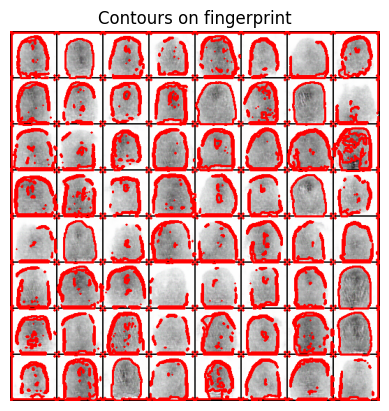

In [4]:
detect_fingerprint_contours('Generated_Images_NIST_Special_Dataset/generated_image_160.bmp')

In [5]:
def detect_fingerprint_by_lines(image_path):
    image = cv2.imread(image_path)
    display_image(image, "Original Image")
    # Step 1
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(gray, "Step 1: Grayscale Image")
    # Step 2
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    display_image(blurred, "Step 2: Blurred Image")
    # Step 3
    edges = cv2.Canny(blurred, 30, 150)
    display_image(edges, "Step 3: Edge Detection Result")
    # Step 4
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    # print(lines)

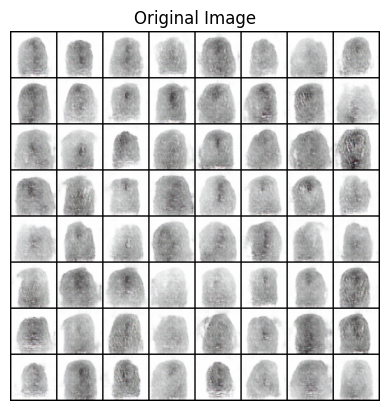

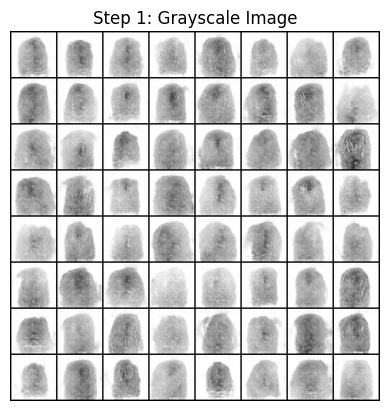

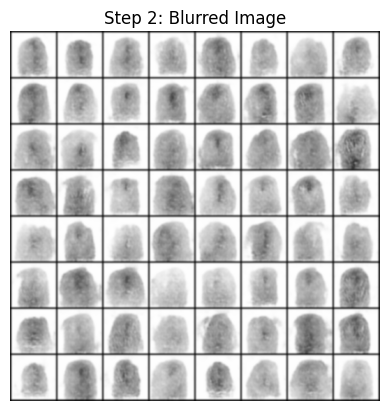

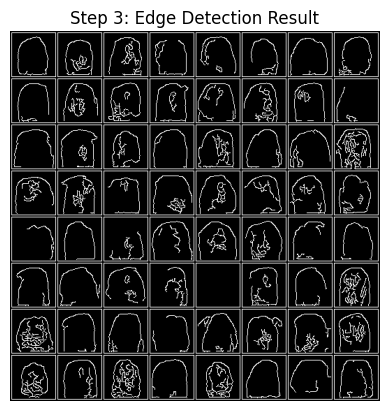

In [6]:
detect_fingerprint_by_lines('Generated_Images_NIST_Special_Dataset/generated_image_160.bmp')